# Juego de la vida / Game of life
## Josué Juárez Morales
-----
Cada célula esta viva o muerta, esto lo representamos asignando el valor $1$ ó $0$ respectivamente en el espaccio de la malla. Las células se actualizan todas al mismo tiempo en cada iteración de acuerdo a las reglas siguientes:

- Una célula muerta con exactamente $3$ células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
- Una célula viva con $2$ ó $3$ células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

Creamos una malla de tamaño $n \times n$. Para una malla de tamaño $n \times m$, definir el $m$ y agregarlo en las condiciones del grid y los ciclos for.

In [2]:
n = 50
grid = np.random.random((n+2, n+2)) #array aleatorio con valores entre cero y uno.
#condiciones iniciales
grid[grid <= 0.90] = 0 #90% células muertas
grid[grid > 0.90] = 1 #10% células vivas
#El juego esta diseñado para una malla infinita, pero en este caso, las orillas se consideran células muertas.
grid[:,0] = 0
grid[:,-1] = 0
grid[0,:] = 0
grid[-1,:] = 0
g = np.copy(grid)

In [3]:
def vida(a,b):
    for i in range(1,n+1):
        for j in range(1,n+1):
            if b[i,j] == 1:
                if ((b[i-1,j-1] + b[i,j-1] + b[i+1,j-1] + b[i-1,j] + b[i+1,j] + b[i-1,j+1] + b[i,j+1] + b[i+1,j+1]) < 2) or (b[i-1,j-1] + b[i,j-1] + b[i+1,j-1] + b[i-1,j] + b[i+1,j] + b[i-1,j+1] + b[i,j+1] + b[i+1,j+1] > 3):
                    a[i,j] = 0
                else:
                    a[i,j] = 1
            elif b[i,j] == 0:
                if b[i-1,j-1] + b[i,j-1] + b[i+1,j-1] + b[i-1,j] + b[i+1,j] + b[i-1,j+1] + b[i,j+1] + b[i+1,j+1] == 3:
                    a[i,j] = 1
                else:
                    a[i,j] = 0
            
    return a

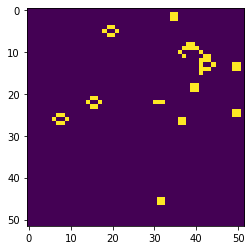

In [4]:
fig = plt.figure()
camera = Camera(fig)
plt.imshow(grid) #print inicial
camera.snap()
#iteración sobre el tiempo
for it in range(100):
    vida(grid, g)
    g = np.copy(grid)
    plt.imshow(grid)
    camera.snap()
    #plt.show()

In [5]:
animation = camera.animate()
animation.save('animacion.mp4')
HTML(animation.to_html5_video())

# Pistola de planeadores de Gosper
---
![Pistola](https://upload.wikimedia.org/wikipedia/commons/9/99/Game_of_life_glider_gun.png)

In [6]:
n = 43
grid = np.zeros((n+2, n+2)) #array de ceros.
#condiciones iniciales

#cuadro izquierdo
grid[5,1] = grid[5,2] = 1
grid[6,1] = grid[6,2] = 1

#estructura central izquierda
grid[3,13] = grid[3,14] = 1
grid[4,12] = grid[4,16] = 1
grid[5,11] = grid[5,17] = 1
grid[6,11] = grid[6,15] = grid[6,17] = grid[6,18] = 1
grid[7,11] = grid[7,17] = 1
grid[8,12] = grid[8,16] = 1
grid[9,13] = grid[9,14] = 1

#esctructura central derecha
grid[1,25] = 1
grid[2,23] = grid[2,25] = 1
grid[3,21] = grid[3,22] = 1
grid[4,21] = grid[4,22] = 1
grid[5,21] = grid[5,22] = 1
grid[6,23] = grid[6,25] = 1
grid[7,25] = 1

#cuadro derecho
grid[3,35] = grid[3,36] = 1
grid[4,35] = grid[4,36] = 1

g = np.copy(grid)

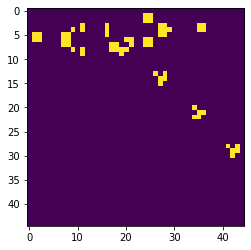

In [7]:
fig = plt.figure()
camera = Camera(fig)
plt.imshow(grid) #print inicial
#plt.show()
camera.snap()
#iteración sobre el tiempo
for it in range(100):
    vida(grid, g)
    g = np.copy(grid)
    plt.imshow(grid)
    #plt.show()
    camera.snap()
    #plt.show()

In [8]:
gosper = camera.animate()
gosper.save('gosper.mp4')
HTML(gosper.to_html5_video())